<a href="https://colab.research.google.com/github/fawazadeniji123/colab/blob/main/Coral_Classification_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coral Classification Challenge

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Uploading dataset from Drive
* the images have already been converted to numpy array and to a `.npz` file before hand because it takes a very long time to upload to colab

In [ ]:
#For Colab

#This is the path for of the folder where the datasets is stored in Drive
path = '/content/drive/MyDrive/Coral Classification Challenge/coral_dataset_compressed.npz' 

with np.load(path) as data:
  train_imgs = data['train']
  test_imgs = data['test']

In [ ]:
print(f'The Size of the train set is: {train_imgs.shape}, and the size of test shape is : {test_imgs.shape}')

The Size of the train set is: (21680, 100, 100, 3), and the size of test shape is : (11963, 100, 100, 3)


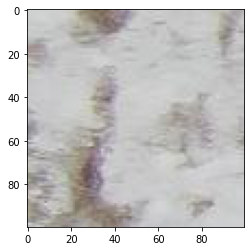

In [ ]:
plt.imshow(train_imgs[0])

## Uploading `train.csv` and `test.csv` files

In [ ]:
path = '/content/drive/MyDrive/Coral Classification Challenge/'
train_csv = pd.read_csv(path+'Train.csv')
test_csv = pd.read_csv(path+'Test.csv')

In [ ]:
train_csv.nunique()

In [ ]:
plt.hist(train_csv['label'])
plt.show()

In [ ]:
train_imgs = 0

## Preprocessing
* normalize the data

In [ ]:
# Normalize pixel values to be between 0 and 1
#train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

### One Hot Encoding

In [ ]:
train_targets = train_csv.drop('Image_ID', axis=1)
train_targets = pd.get_dummies(train_targets)
print(train_targets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21680 entries, 0 to 21679
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   label_Algae                21680 non-null  uint8
 1   label_Hard Coral           21680 non-null  uint8
 2   label_Other                21680 non-null  uint8
 3   label_Other Invertebrates  21680 non-null  uint8
 4   label_Soft Coral           21680 non-null  uint8
dtypes: uint8(5)
memory usage: 106.0 KB
None


In [ ]:
len(train_targets)

In [ ]:
train_targets.head()

In [ ]:
train_targets = np.array(train_targets)
train_targets[:5]

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

## Spliting `train_imgs` into training set and test set

In [ ]:
# Using 90-10 split
X_train, X_test, y_train, y_test = train_imgs[:-2168], train_imgs[-2168:], train_targets[:-2168], train_targets[-2168:]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19512, 100, 100, 3), (2168, 100, 100, 3), (19512, 5), (2168, 5))

In [ ]:
del train_imgs
del train_targets
del train_csv

## Modelling

In [ ]:
tf.random.set_seed(42)

### Build the model

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(100,
                                  100,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model_2 = models.Sequential()
model_2.add(data_augmentation)
model_2.add(layers.Rescaling(1./255, input_shape=(100, 100, 3))),
model_2.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))
model_2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))
model_2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model_2.add(layers.Dropout(0.25))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(5, activation='softmax'))

In [ ]:
model_2.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=64)

### Model Evaluation

In [ ]:
test_loss, test_acc = model_2.evaluate(X_test, y_test)

68/68 [==============================] - 1s 11ms/step - loss: 1.0640 - accuracy: 0.5724


In [ ]:
model_2.save('coral_model_2.h5')

In [ ]:
preds_2 = model_2.predict(test_imgs)

In [ ]:
preds_sub = [cart[np.argmax(pred)] for pred in preds_2]

## Model 1

In [ ]:
# model_1 = models.Sequential()
# model_1.add(layers.Rescaling(1./255, input_shape=(100, 100, 3))),
# model_1.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
# model_1.add(layers.MaxPooling2D((2, 2)))
# model_1.add(layers.Dropout(0.2))
# model_1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
# model_1.add(layers.MaxPooling2D((2, 2)))
# model_1.add(layers.Dropout(0.2))
# model_1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
# model_1.add(layers.Dropout(0.2))
# model_1.add(layers.Flatten())
# model_1.add(layers.Dense(128, activation='relu'))
# model_1.add(layers.Dropout(0.5))
# model_1.add(layers.Dense(5, activation='softmax'))

In [ ]:
#model_1.summary()

### Compile and train the model

In [ ]:
#model_1.compile(optimizer='adam',
#              loss=tf.keras.losses.CategoricalCrossentropy(),
#              metrics=['accuracy'])

#history_1 = model_1.fit(X_train, y_train, epochs=50, batch_size=64)

In [ ]:
del X_train
del y_train

NameError: ignored

In [ ]:
#test_loss, test_acc = model_1.evaluate(X_test, y_test)

In [ ]:
#print(test_acc)

In [ ]:
#model_1.save('coral_classification.h5')

In [ ]:
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Coral Classification Challenge/coral_classification.h5')

In [ ]:
conv_preds = loaded_model.predict(test_imgs)

In [ ]:
cart = ['Algae', 'Hard Coral', 'Other', 'Other Invertebrates', 'Soft Coral']

In [ ]:
preds = [cart[np.argmax(pred)] for pred in conv_preds]

In [ ]:
test_csv['label'] = preds_sub

In [ ]:
test_csv.to_csv('submission02.csv', index=False)